<a href="https://colab.research.google.com/github/gorilla15a/property-valuation-multimodal/blob/main/notebooks/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Extraction

In [ ]:
!git clone https://github.com/gorilla15a/property-valuation-multimodal.git

Cloning into 'property-valuation-multimodal'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 123 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 5.97 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
%cd property-valuation-multimodal

/content/property-valuation-multimodal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("data/processed/train_eda.csv")
test= pd.read_csv("data/processed/test_eda (2).csv")

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os

class PropertyImageDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, f"{row['id']}.png")

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, row["id"]


In [ ]:
from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
import torchvision.models as models
import torch.nn as nn

resnet = models.resnet18(pretrained=True)

# Remove final classification layer
resnet.fc = nn.Identity()

resnet.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 92.2MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

weights = ResNet18_Weights.DEFAULT
resnet = resnet18(weights=weights)
resnet.fc = nn.Identity()
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch

dummy = torch.randn(1, 3, 224, 224)
out = resnet(dummy)

print(out.shape)


torch.Size([1, 512])


In [ ]:
IMAGE_DIR = "/content/drive/MyDrive/property_valuation_mapbox/images/train"

In [ ]:
from torch.utils.data import DataLoader

train_img_dataset = PropertyImageDataset(
    train,
    IMAGE_DIR,
    transform=image_transform
)

train_img_loader = DataLoader(
    train_img_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)


In [ ]:
torch.cuda.is_available()

False

In [ ]:
TRAIN_IMAGE_DIR = "/content/drive/MyDrive/property_valuation_mapbox/images/train"
TEST_IMAGE_DIR  = "/content/drive/MyDrive/property_valuation_mapbox/images/test"

In [ ]:
train["id"] = train["id"].astype(int)
test["id"]  = test["id"].astype(int)

In [ ]:
def extract_embeddings(df, image_dir, model, batch_size=32):
    dataset = PropertyImageDataset(df, image_dir, image_transform)

    loader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2
    )

    all_embeddings = []
    all_ids = []

    model.eval()

    with torch.no_grad():
        for images, ids in tqdm(
            loader,
            desc=f"Extracting embeddings from {os.path.basename(image_dir)}",
            total=len(loader)
        ):
            feats = model(images)          # CPU forward pass
            all_embeddings.append(feats.numpy())
            all_ids.extend(ids.numpy())

    X = np.vstack(all_embeddings)

    emb_df = pd.DataFrame(X)
    emb_df["id"] = all_ids

    return emb_df

In [ ]:
train_img_emb = extract_embeddings(
    df=train,
    image_dir=TRAIN_IMAGE_DIR,
    model=resnet,
    batch_size=32
)

print("Train embeddings shape:", train_img_emb.shape)

Extracting embeddings from train: 100%|██████████| 507/507 [59:02<00:00,  6.99s/it]

Train embeddings shape: (16209, 513)


In [ ]:
train_img_emb.to_csv(
    "data/processed/train_image_embeddings.csv",
    index=False
)

In [ ]:
test_img_emb = extract_embeddings(
    df=test,
    image_dir=TEST_IMAGE_DIR,
    model=resnet,
    batch_size=32
)

print("Test embeddings shape:", test_img_emb.shape)


Extracting embeddings from test: 100%|██████████| 169/169 [18:10<00:00,  6.46s/it]

Test embeddings shape: (5404, 513)


In [ ]:
test_img_emb.to_csv(
    "data/processed/test_image_embeddings.csv",
    index=False
)

# Model Training

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset



In [ ]:
from google.colab import files

print("Please upload 'train_image_embeddings.csv' and 'test_image_embeddings.csv'")
uploaded = files.upload()

Please upload 'train_image_embeddings.csv' and 'test_image_embeddings.csv'


Saving train_image_embeddings.csv to train_image_embeddings.csv
Saving test_image_embeddings.csv to test_image_embeddings.csv


In [ ]:
# Tabular data AFTER EDA & feature engineering
train_tab = pd.read_csv("data/processed/train_eda.csv")
test_tab  = pd.read_csv("data/processed/test_eda (2).csv")

# Image embeddings
train_img_emb = pd.read_csv("train_image_embeddings.csv")
test_img_emb  = pd.read_csv("test_image_embeddings.csv")

print("Train tabular:", train_tab.shape)
print("Test tabular :", test_tab.shape)
print("Train image emb:", train_img_emb.shape)
print("Test image emb :", test_img_emb.shape)


Train tabular: (16209, 23)
Test tabular : (5404, 21)
Train image emb: (16209, 513)
Test image emb : (5404, 513)


Here the embeddings include 513 featuresand the train includes the 2 engineered features accounting for 23 columns.

In [ ]:
# Ensure exactly ONE embedding per ID
train_img_emb = train_img_emb.drop_duplicates(subset="id")
test_img_emb  = test_img_emb.drop_duplicates(subset="id")

assert train_img_emb["id"].duplicated().sum() == 0
assert test_img_emb["id"].duplicated().sum() == 0

print("Clean train image emb:", train_img_emb.shape)
print("Clean test image emb :", test_img_emb.shape)

Clean train image emb: (16110, 513)
Clean test image emb : (5396, 513)


In [ ]:
train_tab = train_tab.drop_duplicates(subset="id")
test_tab = test_tab.drop_duplicates(subset="id")

train_full = train_tab.merge(
    train_img_emb,
    on="id",
    how="inner"
)

test_full = test_tab.merge(
    test_img_emb,
    on="id",
    how="inner"
)

assert train_full["id"].duplicated().sum() == 0
assert test_full["id"].duplicated().sum() == 0

print("Final train_full:", train_full.shape)
print("Final test_full :", test_full.shape)

Final train_full: (16110, 535)
Final test_full : (5396, 533)


In [ ]:
print(
    train_full.shape[0],
    train_tab.shape[0],
    train_img_emb.shape[0]
)


16110 16110 16110


In [ ]:
tabular_features = [
    "sqft_living", "grade", "bathrooms", "bedrooms",
    "condition", "lat", "long", "waterfront",
    "view", "density_proxy", "sqft_living15","floors","sqft_above","sqft_basement"
]

non_image_cols = ["id", "price", "log_price"] + tabular_features

image_features = [c for c in train_full.columns if c not in non_image_cols]

print("Tabular features:", len(tabular_features))
print("Image features:", len(image_features))


Tabular features: 14
Image features: 518


In [ ]:
X_tab = train_full[tabular_features].values
X_img = train_full[image_features].values
y     = train_full["log_price"].values

X_tab_test = test_full[tabular_features].values
X_img_test = test_full[image_features].values

assert X_tab.shape[0] == X_img.shape[0] == y.shape[0]

In [ ]:
image_features_correct = [str(c) for c in range(512)] # Assuming 512 embedding dimensions (0 to 511)

# Re-extract X_img and X_img_test using only the correct numerical image features
X_img = train_full[image_features_correct].values
X_img_test = test_full[image_features_correct].values

# Scale image embeddings first
img_scaler = StandardScaler()
X_img_scaled = img_scaler.fit_transform(X_img)
X_img_test_scaled = img_scaler.transform(X_img_test)

# PCA: reduce 512 TO 150
pca = PCA(n_components=150, random_state=42)
X_img_pca = pca.fit_transform(X_img_scaled)
X_img_test_pca = pca.transform(X_img_test_scaled)

print("Image PCA variance:", pca.explained_variance_ratio_.sum())

Image PCA variance: 0.8485796096467262


In [ ]:
tab_scaler = StandardScaler()
X_tab_scaled = tab_scaler.fit_transform(X_tab)
X_tab_test_scaled = tab_scaler.transform(X_tab_test)

In [ ]:
# Tabular-only
X_tab_final = X_tab_scaled

# Multimodal
X_mm_final = np.hstack([X_tab_scaled, X_img_pca])
X_mm_test  = np.hstack([X_tab_test_scaled, X_img_test_pca])

print("Tabular shape:", X_tab_final.shape)
print("Multimodal shape:", X_mm_final.shape)

Tabular shape: (16110, 14)
Multimodal shape: (16110, 164)


In [ ]:
X_tab_tr, X_tab_val, y_tr, y_val = train_test_split(
    X_tab_final, y, test_size=0.2, random_state=42
)

X_mm_tr, X_mm_val, _, _ = train_test_split(
    X_mm_final, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [ ]:
def evaluate_model(model, X_tr, X_val, y_tr, y_val, name):
    model.fit(X_tr, y_tr)

    # Predictions
    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)
    r2_train = r2_score(y_tr, y_tr_pred)

    return {
        "Model": name,
        "RMSE (log)": rmse,
        "R2 (Train)": r2_train,
        "R2 (Val)": r2_val
    }

In [ ]:
from lightgbm import LGBMRegressor

models = [
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=10), "Ridge Regression"),
    (Lasso(alpha=0.001), "Lasso Regression"),

    (RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ), "Random Forest"),

    (GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ), "Gradient Boosting"),

    (XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ), "XGBoost"),


    (LGBMRegressor(
        n_estimators=800,
        learning_rate=0.05,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    ), "LightGBM")
]

In [ ]:
results = []

for model, name in models:
    # Tabular only
    res_tab = evaluate_model(
        model,
        X_tab_tr, X_tab_val,
        y_tr, y_val,
        f"{name} (Tabular)"
    )
    results.append(res_tab)

    # Multimodal
    res_mm = evaluate_model(
        model,
        X_mm_tr, X_mm_val,
        y_tr, y_val,
        f"{name} (Tabular + Image)"
    )
    results.append(res_mm)

results_df = pd.DataFrame(results)
results_df.sort_values("RMSE (log)")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1833
[LightGBM] [Info] Number of data points in the train set: 12888, number of used features: 14
[LightGBM] [Info] Start training from score 13.047016


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40083
[LightGBM] [Info] Number of data points in the train set: 12888, number of used features: 164
[LightGBM] [Info] Start training from score 13.047016


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,RMSE (log),R2 (Train),R2 (Val)
12,LightGBM (Tabular),0.167400,0.977047,0.899848
10,XGBoost (Tabular),0.167783,0.941563,0.899391
13,LightGBM (Tabular + Image),0.171680,0.997382,0.894663
11,XGBoost (Tabular + Image),0.172087,0.964417,0.894162
8,Gradient Boosting (Tabular),0.174393,0.911304,0.891307
9,Gradient Boosting (Tabular + Image),0.179155,0.916921,0.885289
6,Random Forest (Tabular),0.179390,0.970574,0.884988
7,Random Forest (Tabular + Image),0.194160,0.973653,0.865270
5,Lasso Regression (Tabular + Image),0.249660,0.781935,0.777238
3,Ridge Regression (Tabular + Image),0.249676,0.782327,0.777209


In [ ]:
results_df = pd.DataFrame(results)
results_df.sort_values("RMSE (log)")

,Model,RMSE (log),R2 (Train),R2 (Val)
12,LightGBM (Tabular),0.167400,0.977047,0.899848
10,XGBoost (Tabular),0.167783,0.941563,0.899391
13,LightGBM (Tabular + Image),0.171680,0.997382,0.894663
11,XGBoost (Tabular + Image),0.172087,0.964417,0.894162
8,Gradient Boosting (Tabular),0.174393,0.911304,0.891307
9,Gradient Boosting (Tabular + Image),0.179155,0.916921,0.885289
6,Random Forest (Tabular),0.179390,0.970574,0.884988
7,Random Forest (Tabular + Image),0.194160,0.973653,0.865270
5,Lasso Regression (Tabular + Image),0.249660,0.781935,0.777238
3,Ridge Regression (Tabular + Image),0.249676,0.782327,0.777209


We are selecting XGboost multimodel although train r2 is more but it is due to the better feature extraction using the pca feature columns and even the validation accuracy is better and as seen in eda there were many non linear relations between the target variables and features those are better learnt by tree models like XGboost.

XGBoost Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

xgb_pipeline_tab = Pipeline([
    ("model", XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_pipeline_mm = Pipeline([
    ("model", XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


In [ ]:
xgb_pipeline_tab.fit(X_tab_final, y)
xgb_pipeline_mm.fit(X_mm_final, y)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
test_preds = xgb_pipeline_mm.predict(X_mm_test)
test_preds_price = np.expm1(test_preds)

submission = pd.DataFrame({
    "id": test_full["id"],
    "predicted_price": test_preds_price
})

submission.to_csv("23113029_final.csv", index=False)

# Grad-Cam Analysis

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=4be09683aee25941dcfb791f7a547f49c71f8ac683044b95617356e484d7c0b6
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import models, transforms
from PIL import Image

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
model = models.resnet18(pretrained=True)
model.eval()
model.to(device)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
target_layers = [model.layer4[-1]]

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
IMAGE_DIR = "/content/drive/MyDrive/property_valuation_mapbox/images/train"

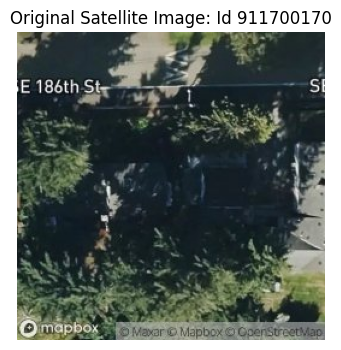

In [ ]:
img_path = "/content/drive/MyDrive/property_valuation_mapbox/images/train/9117000170.png"  # change ID if needed

image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis("off")
plt.title("Original Satellite Image: Id 911700170")
plt.show()


In [ ]:
cam = GradCAM(
    model=model,
    target_layers=target_layers
)

In [ ]:
grayscale_cam = cam(
    input_tensor=input_tensor,
    targets=None
)

grayscale_cam = grayscale_cam[0]

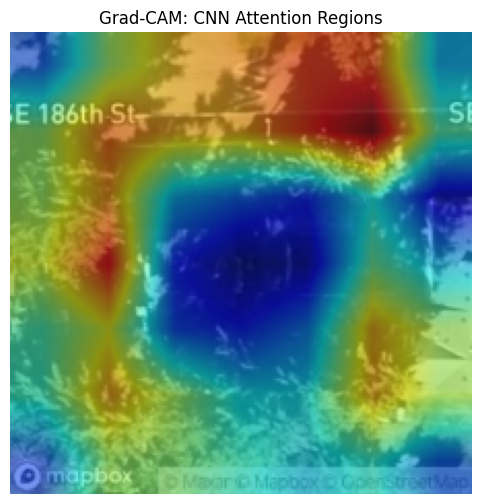

In [ ]:
resize_transform = transforms.Resize((224, 224))
resized_image = resize_transform(image)
rgb_image = np.array(resized_image).astype(np.float32) / 255.0

visualization = show_cam_on_image(
    rgb_image,
    grayscale_cam,
    use_rgb=True
)

plt.figure(figsize=(6,6))
plt.imshow(visualization)
plt.axis("off")
plt.title("Grad-CAM: CNN Attention Regions")
plt.show()

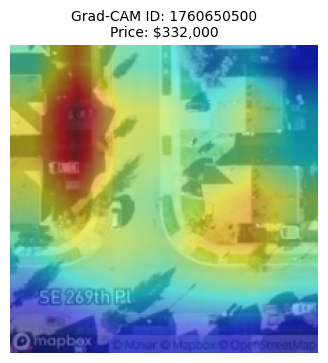

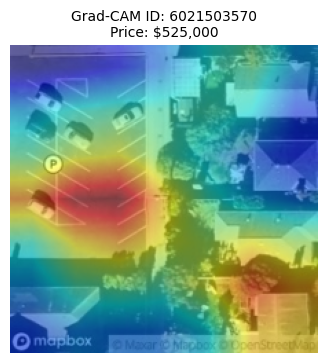

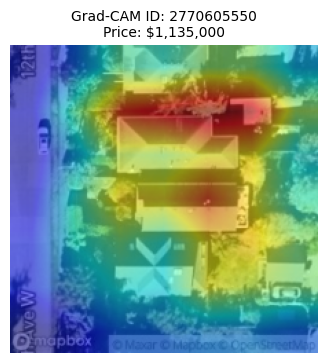

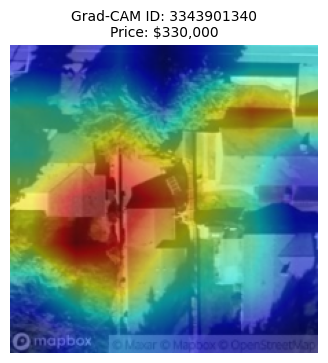

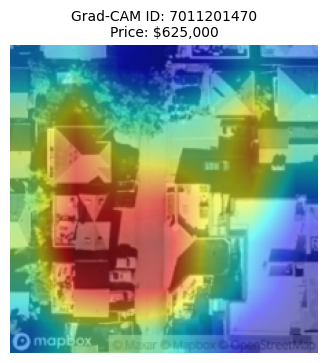

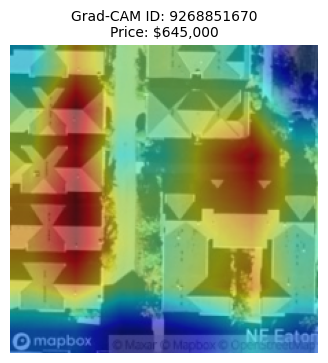

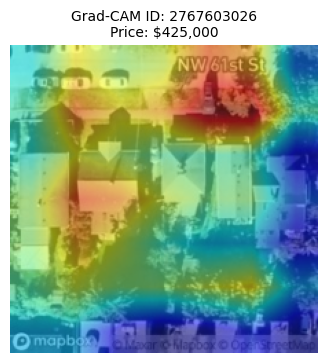

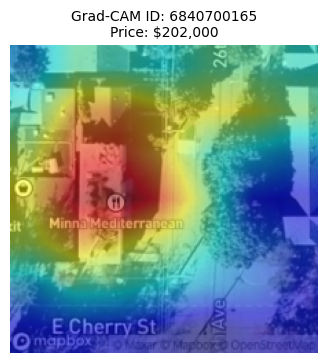

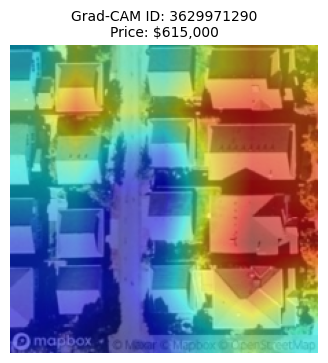

In [ ]:
sample_ids = [
    "1760650500",
    "6021503570",
    "2770605550",
    "3343901340","7011201470","9268851670","2767603026","6840700165","3629971290"
]

for sid in sample_ids:
    actual_price = train.loc[train["id"] == int(sid), "price"].values[0]
    path = f"/content/drive/MyDrive/property_valuation_mapbox/images/train/{sid}.png"
    image = Image.open(path).convert("RGB")

    input_tensor = transform(image).unsqueeze(0).to(device)

    cam_map = cam(
        input_tensor=input_tensor,
        targets=None
    )[0]

    # Resize the image to 224x224 before converting to numpy array for display
    resized_image_for_display = transforms.Resize((224, 224))(image)
    rgb_image = np.array(resized_image_for_display).astype(np.float32) / 255.0

    vis = show_cam_on_image(rgb_image, cam_map, use_rgb=True)

    plt.figure(figsize=(4,4))
    plt.imshow(vis)
    plt.axis("off")
    plt.title( f"Grad-CAM ID: {sid}\nPrice: ${actual_price:,.0f}",
        fontsize=10)
    plt.show()